In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


from xgboost import XGBRegressor
from sklearn import metrics

%matplotlib inline
from matplotlib import style
style.use("seaborn")

from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\AppData\Local\Temp\ipykernel_25144\321796212.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn")


In [2]:
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
exercise_df = exercise.merge(calories , on = "User_ID")
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
exercise_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [8]:
print("This dataset has " , exercise_df.shape[0] ," instances and ",  exercise_df.shape[1] , " columns.")

This dataset has  15000  instances and  9  columns.


<Axes: xlabel='Age'>

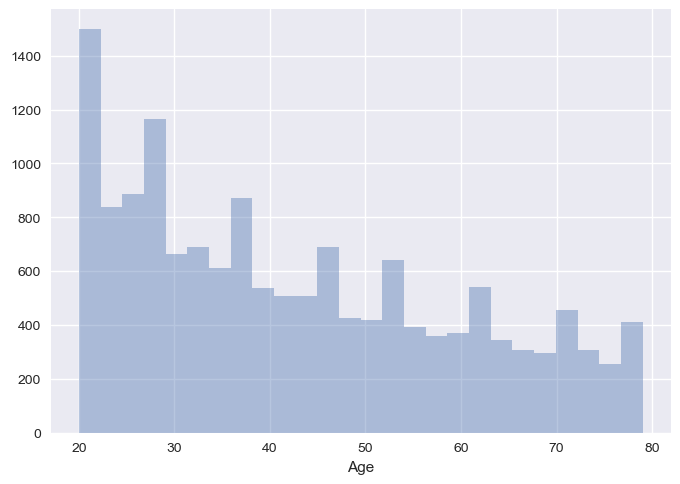

In [9]:
sns.distplot(exercise_df['Age'],kde=False)

<Axes: xlabel='Height'>

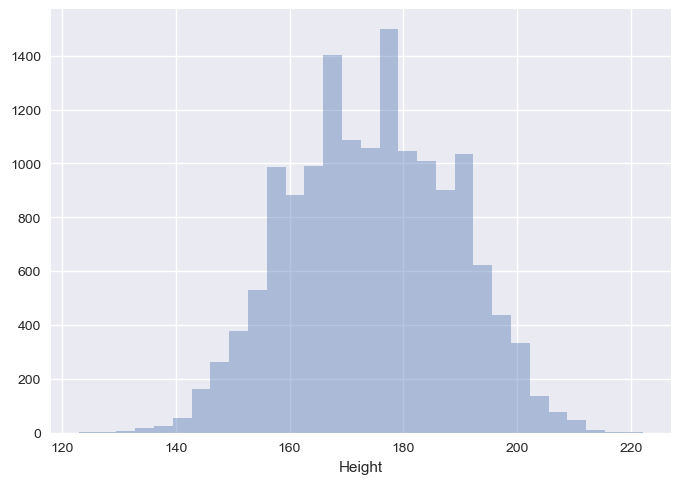

In [10]:
sns.distplot(exercise_df['Height'],kde=False,bins=30)

<Axes: xlabel='Weight'>

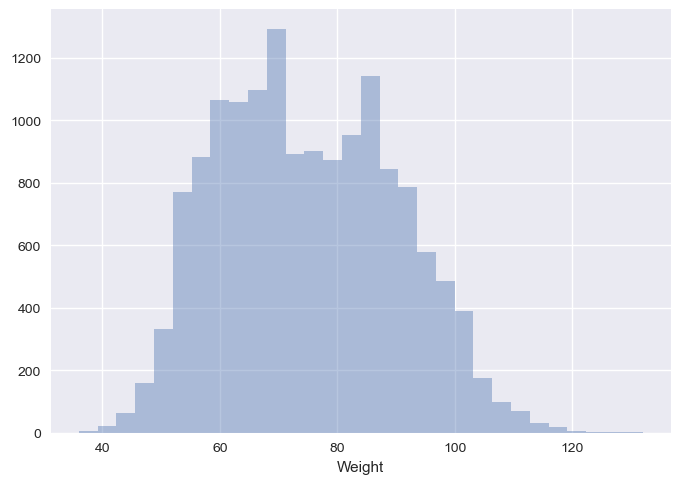

In [11]:
sns.distplot(exercise_df['Weight'],kde=False,bins=30)

<Axes: xlabel='Duration'>

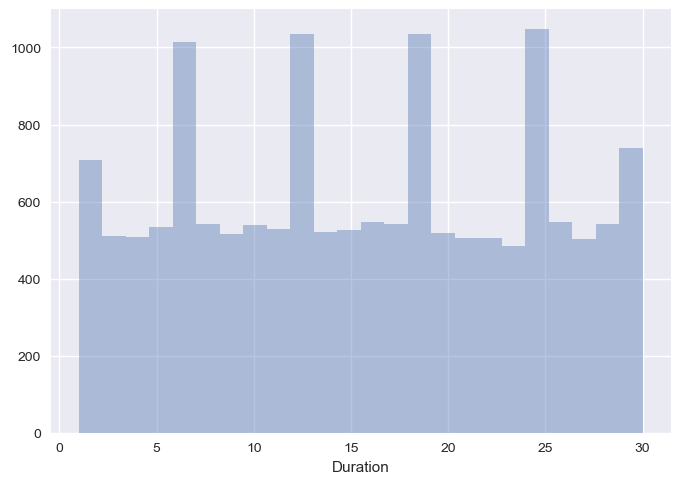

In [12]:
sns.distplot(exercise_df['Duration'],kde=False)

<Axes: xlabel='Heart_Rate'>

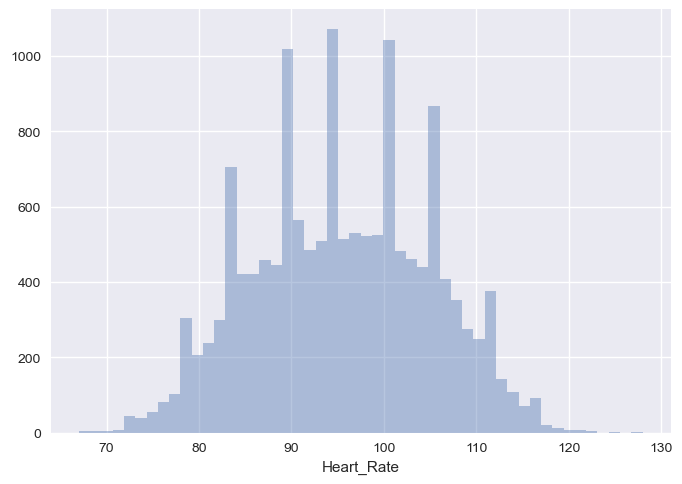

In [13]:
sns.distplot(exercise_df['Heart_Rate'],kde=False)

<Axes: xlabel='Body_Temp'>

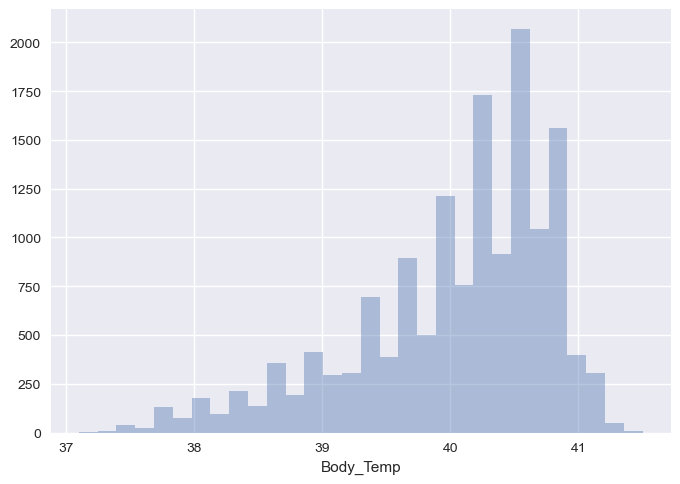

In [14]:
sns.distplot(exercise_df['Body_Temp'],kde=False,bins=30)

<Axes: xlabel='Calories'>

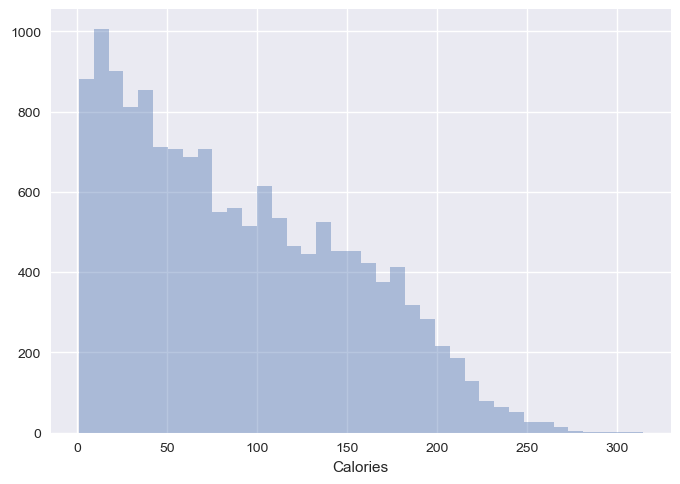

In [15]:
sns.distplot(exercise_df['Calories'],kde=False)

<Axes: xlabel='Gender', ylabel='count'>

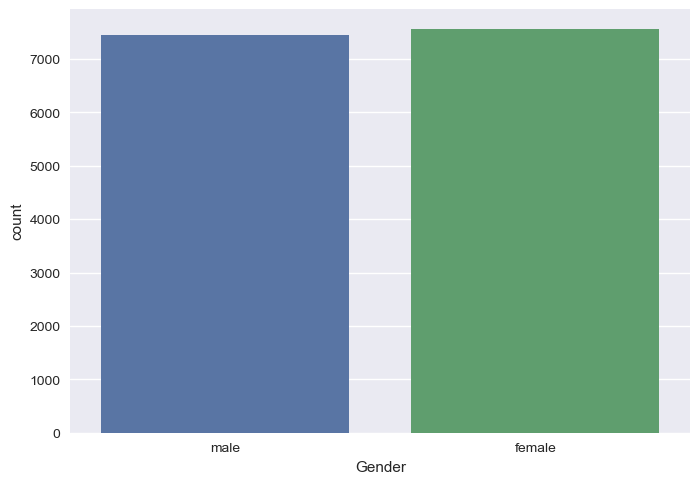

In [16]:
sns.countplot(x='Gender', data=exercise_df)

<Axes: xlabel='Gender', ylabel='Height'>

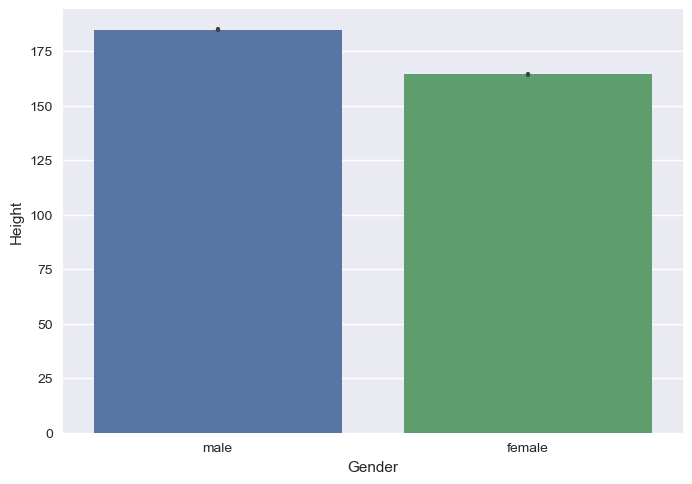

In [17]:
sns.barplot(x='Gender', y='Height', data=exercise_df)

<Axes: xlabel='Gender', ylabel='Calories'>

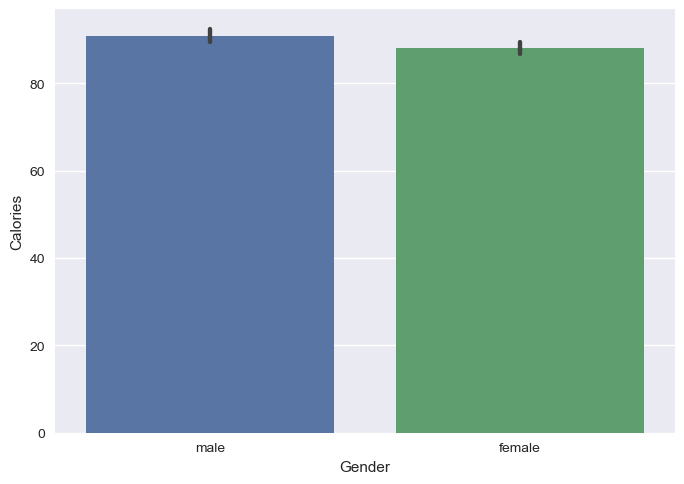

In [18]:
sns.barplot(x='Gender', y='Calories', data=exercise_df)

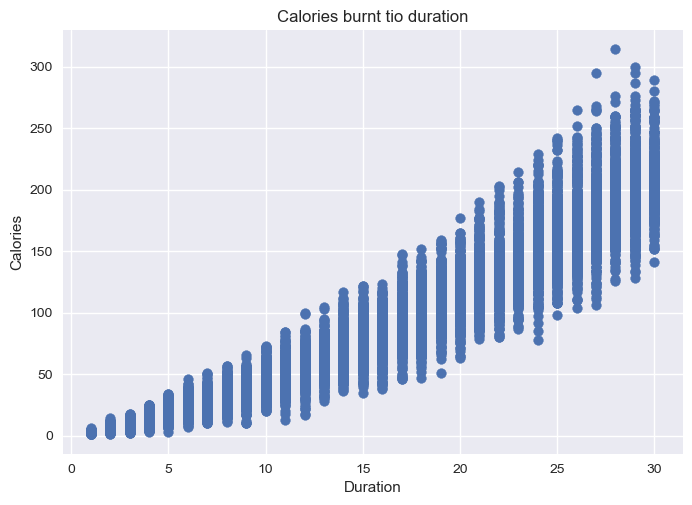

In [19]:
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.title("Calories burnt tio duration")
plt.scatter(exercise_df['Duration'],exercise_df['Calories'])

In [20]:
print("The shape of dataset before dropping duplicates : " , exercise_df.shape)
exercise_df.drop_duplicates(subset = ['User_ID'], keep='last' , inplace = True)    
print("The shape of dataset after dropping duplicates : " , exercise_df.shape)
     

The shape of dataset before dropping duplicates :  (15000, 9)
The shape of dataset after dropping duplicates :  (15000, 9)


In [21]:
exercise_df.drop(columns = "User_ID" , inplace = True)

In [22]:
mylist = []
for i in exercise_df.Gender:
    if i == "male":
        mylist.append(0)
    elif i == "female":
        mylist.append(1)
exercise_df["Gender_index"] = mylist

In [23]:
exercise_df.drop("Gender",inplace=True, axis= 1)

In [24]:
exercise_df

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_index
0,68,190.0,94.0,29.0,105.0,40.8,231.0,0
1,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,69,179.0,79.0,5.0,88.0,38.7,26.0,0
3,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,27,154.0,58.0,10.0,81.0,39.8,35.0,1
...,...,...,...,...,...,...,...,...
14995,20,193.0,86.0,11.0,92.0,40.4,45.0,1
14996,27,165.0,65.0,6.0,85.0,39.2,23.0,1
14997,43,159.0,58.0,16.0,90.0,40.1,75.0,1
14998,78,193.0,97.0,2.0,84.0,38.3,11.0,0


In [25]:
x=exercise_df.drop('Calories',axis='columns')
x

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_index
0,68,190.0,94.0,29.0,105.0,40.8,0
1,20,166.0,60.0,14.0,94.0,40.3,1
2,69,179.0,79.0,5.0,88.0,38.7,0
3,34,179.0,71.0,13.0,100.0,40.5,1
4,27,154.0,58.0,10.0,81.0,39.8,1
...,...,...,...,...,...,...,...
14995,20,193.0,86.0,11.0,92.0,40.4,1
14996,27,165.0,65.0,6.0,85.0,39.2,1
14997,43,159.0,58.0,16.0,90.0,40.1,1
14998,78,193.0,97.0,2.0,84.0,38.3,0


In [26]:
y=exercise_df.Calories
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

<Axes: >

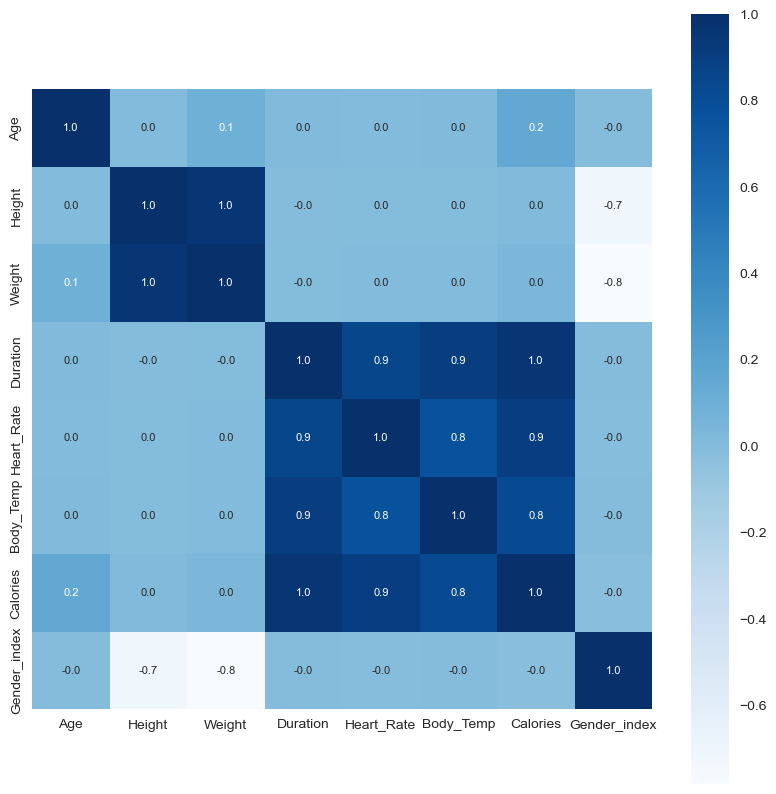

In [27]:
correlation = exercise_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [29]:
x_train

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_index
1154,38,169.0,67.0,3.0,85.0,38.5,1
9804,30,194.0,96.0,9.0,91.0,39.6,0
7919,78,182.0,79.0,7.0,84.0,39.4,1
4854,50,171.0,77.0,29.0,111.0,40.8,0
5947,32,172.0,66.0,29.0,105.0,40.8,1
...,...,...,...,...,...,...,...
11798,49,178.0,71.0,12.0,98.0,39.9,1
13896,67,159.0,58.0,23.0,101.0,40.4,1
6637,25,167.0,64.0,20.0,100.0,40.4,1
2575,36,167.0,64.0,28.0,108.0,40.8,1


In [30]:
x_test

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_index
7592,41,172.0,74.0,24.0,98.0,40.8,1
3551,70,189.0,96.0,24.0,113.0,40.9,0
9698,53,173.0,68.0,7.0,96.0,39.3,1
3759,36,191.0,96.0,2.0,82.0,38.4,0
2353,46,169.0,68.0,20.0,111.0,40.6,1
...,...,...,...,...,...,...,...
8859,20,161.0,60.0,29.0,107.0,40.3,1
2886,40,152.0,49.0,11.0,87.0,39.8,1
14357,57,160.0,62.0,23.0,103.0,40.2,1
9430,58,171.0,67.0,6.0,82.0,39.4,1


In [31]:
model = XGBRegressor()

In [32]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
p = model.predict(x_test)
p

array([125.58828 , 222.11377 ,  38.725952, ..., 144.3179  ,  23.425894,
        90.100494], dtype=float32)

In [34]:
y_test

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64

In [35]:
mae = metrics.mean_absolute_error(y_test, p)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4836762582858403


In [36]:
mse=mean_squared_error(y_test, p)
print("mean square error= ", mse)

mean square error=  4.715038363064073


In [38]:
model.score(x_train,y_train)

0.9995691477017405

In [39]:
model.score(x_test,y_test)

0.998799522480255

In [40]:
from sklearn.linear_model import LinearRegression
lrModel=LinearRegression()
lrModel.fit(x_train,y_train)

LinearRegression()

In [41]:
p=lrModel.predict(x_test)
p

array([137.49241057, 182.18166512,  50.15864741, ..., 157.56637167,
        16.54924422, 100.21047087])

In [42]:
y_test

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64

In [43]:
lrModel.score(x_train,y_train)

0.9672762198112508

In [44]:
lrModel.score(x_test,y_test)

0.9668790377181355

In [45]:
lrModel.coef_

array([  0.4971492 ,  -0.19413313,   0.31333848,   6.64043789,
         1.98718175, -17.09094547,   1.4198873 ])

In [46]:
lrModel.intercept_

469.089511093263

In [47]:
lrModel.predict([[80,160.0,75.0,20.0,65.0,37.0,1]])

array([132.33100875])

In [48]:
lrModel.predict([[21,181.0,76.0,20.0,100.0,37.6,0]])

array([157.11265551])

In [49]:
mae = metrics.mean_absolute_error(y_test, p)
print("Mean Absolute Error = ", mae)


Mean Absolute Error =  8.385188053147209


In [ ]:
mse=mean_squared_error(y_test, p)
print("mean square error= ", mse)